In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.optimize import minimize

sns.set(context="talk")

#### Load dataset and neural networks weight

In [2]:
data = loadmat("ex3data1.mat")
X = data["X"]
print("X matrix shape =", data["X"].shape)
y = data["y"]
print("y matrix shape =", data["y"].shape)
num_classes = 10 # 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)

data = loadmat("ex3weights.mat")
theta1 = data["Theta1"]
print("theta1 matrix shape =", data["Theta1"].shape)
theta2 = data["Theta2"]
print("theta2 matrix shape =", data["Theta2"].shape)

X matrix shape = (5000, 400)
y matrix shape = (5000, 1)
theta1 matrix shape = (25, 401)
theta2 matrix shape = (10, 26)


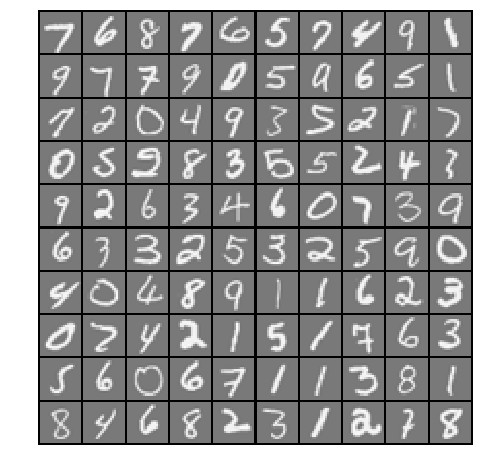

In [3]:
def displayData(X, ex_width=20, figsize=(8, 8)):
    # Compute rows, cols
    m, n = X.shape
    ex_height = n / ex_width
    # Compute number of items to display
    disp_rows = np.floor(np.sqrt(m))
    disp_cols = np.ceil(m/disp_rows)
    # Between images padding
    pad = 1
    # Setup blank display
    disp_array = -np.ones((int(pad + disp_rows*(ex_height + pad)), int(pad + disp_cols*(ex_width + pad))))
    curr_ex = 0
    for i in range(int(disp_rows)):
        for j in range(int(disp_cols)):
            if curr_ex == m:
                break
            max_val = np.max(np.abs((X[0,:])))
            disp_array[int(pad + i*(ex_height+pad)): int(pad + i*(ex_height+pad) + ex_height), \
                       int(pad + j*(ex_width+pad)): int(pad + j*(ex_width+pad) + ex_width)] \
            = X[curr_ex, :].reshape(int(ex_width), int(ex_height)).T
            curr_ex = curr_ex + 1
        if curr_ex == m:
            break
    plt.figure(figsize=figsize)
    plt.imshow(disp_array, cmap="gray")
    plt.axis("off")
    plt.show()
    
# Randomly select 100 data points to display
ramdom_indices = np.random.choice(range(5000), 100)
sample = X[ramdom_indices, :]
displayData(sample)

#### Implement feedforward propagation for the neural network.

In [4]:
# Logistic regression function
def hypo(theta, X):
    h = 1 / (1 + np.exp(-X.dot(theta)))
    return h

# Neural network feedforwardd propagation to predict output 'y' from input 'X'
def predict(theta1, theta2, X):
    m = X.shape[0]
    
    # Layer 1 (Input), 400 units
    a1 = np.concatenate((np.ones((m, 1)), X), axis=1)
    # Layer 2 (Hidden), 25 units
    a2 = hypo(theta1.T, a1)
    a2 = np.concatenate((np.ones((m, 1)), a2), axis=1)
    # Layer 3 (Output), 10 units
    a3 = hypo(theta2.T, a2)
    
    # Predict digit from maximum output hypo.
    p = np.argmax(a3, axis=1)
    # Octave indices are 1:10, Python indices are 0:9. Weight training by octave, so offset value by one
    p = (p+1)%10
    
    return p.reshape(-1, 1)

p = predict(theta1, theta2, X)
acc = np.mean(np.array(p==(y%10), dtype=float))
print("Training Set Accuracy: {0:.2f}%".format(acc*100))

Training Set Accuracy: 97.52%


#### Randomly permute examples

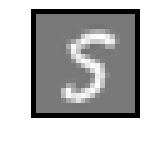

Neural Network Prediction: 5



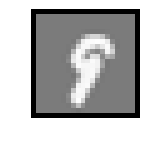

Neural Network Prediction: 9



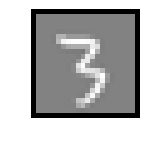

Neural Network Prediction: 3



In [5]:
m = X.shape[0]
rp = np.random.permutation(range(5000))
for i in range(3):
    displayData(X[rp[i], :].reshape((1, -1)), figsize=(2, 2))
    p = predict(theta1, theta2, X[rp[i], :].reshape((1, -1))).ravel()[0]
    print("Neural Network Prediction: {0:}\n".format(p))